# **Introduction**
In this notebook,I use some simple techniques for sentiment analysis. There are many models/techniques that is used to sentiment analysis but here I use simple approach so that one can understand easily how to preprocess data and detect sentiment.

# **Table of Contents**
* Import tools/libraries
* Load data set
* Target visualization
* Text Cleaning
* Remove Stopward
* Stemming
* Split data set
* Tokenization
* Word Embedding
* Model
* Prediction

### **All the necessary tools/libraries**
All the tools that help us to complete this task.

In [1]:
import re
import string
import numpy as np 
import random
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import os
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow
from keras.preprocessing.text import Tokenizer
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch
from sklearn.preprocessing import LabelEncoder

### **Load data set**
This data set contain 6 columns but for sentiment analysis we need just two columns namely 1st columns and last columns. The columns name for this data set is not clear, so to fixed it we change the columns name.

In [2]:
columns  = ["sentiment", "ids", "date", "flag", "user", "text"]
data = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1", names = columns)
data.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


As we work on only two columns namely sentiment and text so we can separate thoes two columns.

In [3]:
data = data[['sentiment','text']]
data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


### **Target visualization**
our target is sentiment, and we have to predict when it is positive or negative. So, as our data set contain 0 and 4 so we need to replace thoes value as negative and possitive, and later we will encode thoes values as 0 and 1.

<AxesSubplot:>

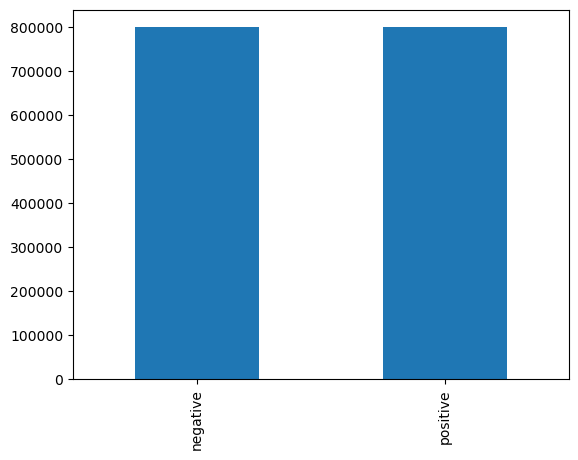

In [4]:
class_dict = {0:'negative', 4:'positive'}
data['sentiment'] = data['sentiment'].apply(lambda x:  class_dict[x])
count = data['sentiment'].value_counts()
count.plot(kind='bar')

### **Text Cleaning**
Our data set is not clear, it contains uppercase, brackets, links, punctuation and so many things. We need to remove thoes things from our data. Here, we will use re library to fixed thoes things.

In [5]:
def cleaning(a):
    a = str(a).lower()
    a = re.sub('\[.*?\]', '', a)
    a = re.sub('[%s]' % re.escape(string.punctuation), '', a)
    a = re.sub('\n', '', a)
    a = re.sub('https?://\S+|www\.\S+', '', a)
    a = re.sub('<.*?>+', '', a)
    a = re.sub('\w*\d\w*', '', a)
    return a

data['text'] = data['text'].apply(cleaning)
data.head()

,sentiment,text
0,negative,switchfoot awww thats a bummer you shoulda ...
1,negative,is upset that he cant update his facebook by t...
2,negative,kenichan i dived many times for the ball manag...
3,negative,my whole body feels itchy and like its on fire
4,negative,nationwideclass no its not behaving at all im ...


### **Remove Stopwords**
In Natural Language Processing (NLP), stop words are commonly occurring words that are filtered out before or after processing of text data. Stop words are usually words that do not contribute much to the meaning of a sentence or document, and are therefore not considered useful for text analysis. Examples of stop words include "the", "and", "a", "an", "in", "of", "is", "to", "that", "it", and so on.Removing stop words from a text can help reduce the dimensionality of the dataset, which can make analysis more efficient and effective.

In [6]:
s_words = stopwords.words('english')

def removing(text):
    a = ' '.join(i for i in text.split(' ') if i not in s_words)
    return a
    
data['text'] = data['text'].apply(removing)
data.head()

,sentiment,text
0,negative,switchfoot awww thats bummer shoulda got da...
1,negative,upset cant update facebook texting might cry r...
2,negative,kenichan dived many times ball managed save ...
3,negative,whole body feels itchy like fire
4,negative,nationwideclass behaving im mad cant see


### **Stemming**
Stemming is a technique used in natural language processing (NLP) to reduce words to their base or root form, which is called the stem. The goal of stemming is to reduce the inflectional and derivational forms of words to a common base form, which can simplify text analysis and improve the accuracy of text-based applications such as search engines, sentiment analysis, and text classification.

For example, the words "running", "runs", and "ran" can be reduced to their stem "run", which can help to identify them as variants of the same word and thus improve the accuracy of analysis.

In [7]:
snow_stemmer = nltk.SnowballStemmer("english")

def stemming(text):
    text = ' '.join(snow_stemmer.stem(i) for i in text.split(' '))
    return text

data['text'] = data['text'].apply(stemming)
data.head()

,sentiment,text
0,negative,switchfoot awww that bummer shoulda got dav...
1,negative,upset cant updat facebook text might cri resul...
2,negative,kenichan dive mani time ball manag save rest...
3,negative,whole bodi feel itchi like fire
4,negative,nationwideclass behav im mad cant see


### **Target Encoding**

In [8]:
a = LabelEncoder()
a.fit(data['sentiment'])

data['sentiment'] = a.transform(data['sentiment'])
data.head()

,sentiment,text
0,0,switchfoot awww that bummer shoulda got dav...
1,0,upset cant updat facebook text might cri resul...
2,0,kenichan dive mani time ball manag save rest...
3,0,whole bodi feel itchi like fire
4,0,nationwideclass behav im mad cant see


### **Split data set**

In [9]:
x = data['text']
y = data['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

 ### **Tokenization**
In Natural Language Processing (NLP), tokenization is the process of breaking up a text into individual words, phrases, symbols, or other meaningful elements, called tokens. Tokenization is a crucial step in NLP because most text analysis and processing tasks rely on being able to identify and manipulate individual units of meaning within a text.

In [10]:
token = Tokenizer()
#token.fit_on_texts(list(x_train) + list(x_test))
token.fit_on_texts(x_train)
word_index = token.word_index
v_size = len(token.word_index) + 1
x_train = pad_sequences(token.texts_to_sequences(x_train),maxlen = 30)
x_test = pad_sequences(token.texts_to_sequences(x_test),maxlen = 30)

# **Word Embedding**
In natural language processing (NLP), word embedding is a technique used to represent words or phrases in a vector space, where each dimension of the vector represents a different feature or characteristic of the word. Word embedding algorithms aim to capture the semantic and syntactic relationships between words in a language, such as word similarity, word analogies, and word associations.

Here, I use glove pre-trained embedding, it was developed by stanford university researchers.

### **Access Glove file and Unzip the Folder**

In [11]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2023-02-28 12:04:22--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-02-28 12:04:23--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-02-28 12:04:23--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awai

### **Create dictionary**
Here, I create a dictionary for each word and respective vector. Here, I use glove 300d file

In [12]:
gl_em_dict = {}
with open('glove.6B.300d.txt','r') as f:
  for j in f:
    v = j.split()
    w = v[0]
    word_v = np.asarray(v[1:],'float32')
    gl_em_dict[w]=word_v

### **Creating Embedding Matrix**
This embedding matrix will be used as the initial weights for an embedding layer in a neural network.

In [13]:
em_matrix = np.zeros((v_size, 300))
for w, i in word_index.items():
  em_vector = gl_em_dict.get(w)
  if em_vector is not None:
    em_matrix[i] = em_vector

### **Initialize Embedding Layer**

In [14]:
em_layer = tensorflow.keras.layers.Embedding(v_size,300,weights=[em_matrix],input_length=30,trainable=False)

### **Creating Model**

In [15]:
s_input = Input(shape=(30), dtype='int32')
em_sequences = em_layer(s_input)
layer = SpatialDropout1D(0.2)(em_sequences)
layer = Conv1D(64, 5, activation='relu')(layer)
layer = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(layer)
layer = Dense(512, activation='relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(512, activation='relu')(layer)
output = Dense(1, activation='sigmoid')(layer)
model = tensorflow.keras.Model(s_input, output)

### **Model Compiling**

In [16]:
model.compile(optimizer= 'adam', loss='binary_crossentropy',metrics=['accuracy'])

### Train the Model

In [17]:
history = model.fit(x_train, y_train, batch_size=1024, epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
1172/1172 [==============================] - 291s 239ms/step - loss: 0.5321 - accuracy: 0.7296 - val_loss: 0.4967 - val_accuracy: 0.7560
Epoch 2/10
1172/1172 [==============================] - 281s 240ms/step - loss: 0.5016 - accuracy: 0.7523 - val_loss: 0.4871 - val_accuracy: 0.7616
Epoch 3/10
1172/1172 [==============================] - 282s 240ms/step - loss: 0.4922 - accuracy: 0.7590 - val_loss: 0.4885 - val_accuracy: 0.7627
Epoch 4/10
1172/1172 [==============================] - 283s 242ms/step - loss: 0.4864 - accuracy: 0.7628 - val_loss: 0.4818 - val_accuracy: 0.7655
Epoch 5/10
1172/1172 [==============================] - 283s 242ms/step - loss: 0.4824 - accuracy: 0.7654 - val_loss: 0.4796 - val_accuracy: 0.7670
Epoch 6/10
1172/1172 [==============================] - 285s 243ms/step - loss: 0.4793 - accuracy: 0.7672 - val_loss: 0.4791 - val_accuracy: 0.7673
Epoch 7/10
1172/1172 [==============================] - 285s 243ms/step - loss: 0.4769 - accuracy: 0.7686 - val_

### **Plotting Accuracy and Loss**

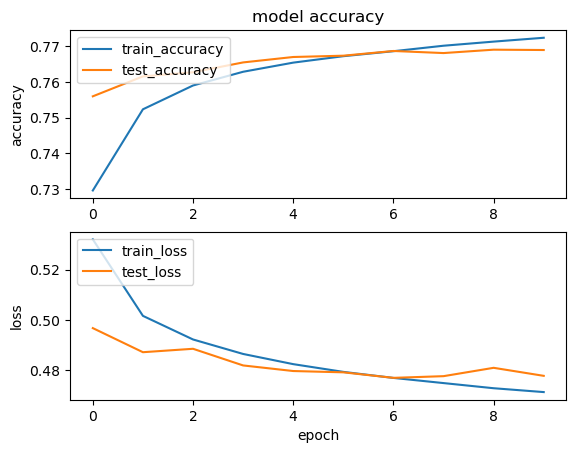

In [18]:
s, (a, b) = plt.subplots(2,1)
a.plot(history.history['accuracy'])
a.plot(history.history['val_accuracy'])
a.set_title('model accuracy')
a.set_ylabel('accuracy')
a.legend(['train_accuracy', 'test_accuracy'], loc='upper left')

b.plot(history.history['loss'])
b.plot(history.history['val_loss'])
b.set_ylabel('loss')
b.set_xlabel('epoch')
b.legend(['train_loss', 'test_loss'], loc = 'upper left')

### Model Evaluating

In [19]:
ac = model.evaluate(x_test,y_test)

12500/12500 [==============================] - 183s 15ms/step - loss: 0.4777 - accuracy: 0.7689


In [20]:
print('test set\n  loss: {:0.2f}\n  accuracy: {:0.2f}'.format(ac[0],ac[1]))

test set
  loss: 0.48
  accuracy: 0.77


### **Sample Prediction**

In [21]:
t = ['he is a good boy']
t = token.texts_to_sequences(t)
t = pad_sequences(t, maxlen=30)
sentiment = model.predict(t)
print(sentiment)
if(sentiment > 0.5):
    print("positive")
else:
    print("negative")

1/1 [==============================] - 0s 474ms/step
[[0.8278474]]
positive


### This notebook is under construction, and I will provide code explanations for every line of this notebook. If you like this notebook please give me an upvote and then it would be my pleasure.

Special thanks to https://www.kaggle.com/code/arunrk7/nlp-beginner-text-classification-using-lstm#Word-Emdedding this amazing notebook